In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim
from torch.optim import SGD
import torch.nn as nn
import torchvision
from torchvision.transforms import transforms
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

+ Download dữ liệu CIFAR10 sau đó chia thành 2 tập dữ liệu train và validation.
+ Chuẩn hóa dữ liệu với mean = 0.5 và std = 0.5

In [2]:
transform = transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
trainset = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True, transform=transform
)
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=64, shuffle=True, num_workers=2
)
testset = torchvision.datasets.CIFAR10(
    root='./data', train=False, download=True, transform=transform
)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=64, shuffle=False, num_workers=2
)

100%|██████████| 170M/170M [00:05<00:00, 29.0MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


+ Hiển thị 5 ảnh đầu tiên trong tập dữ liệu testing

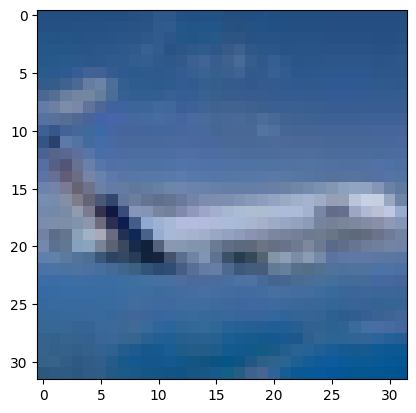

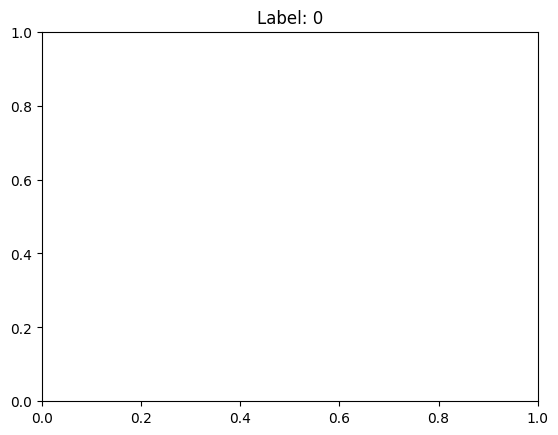

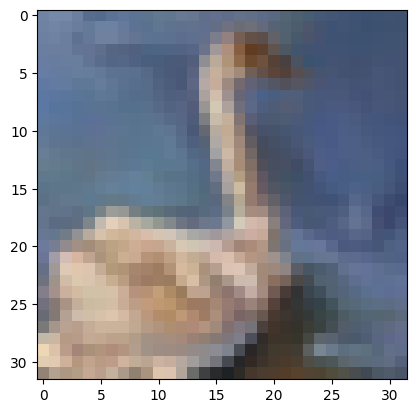

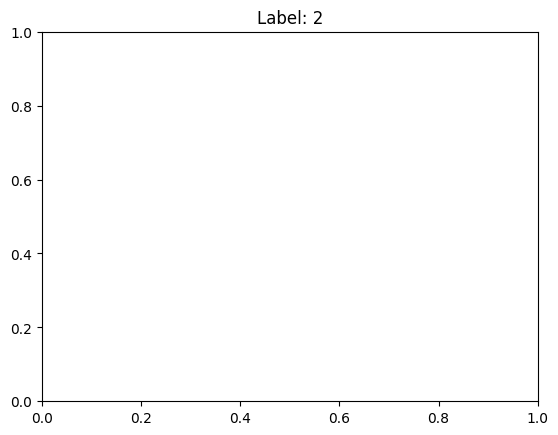

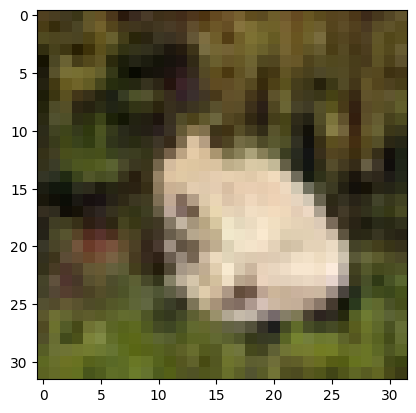

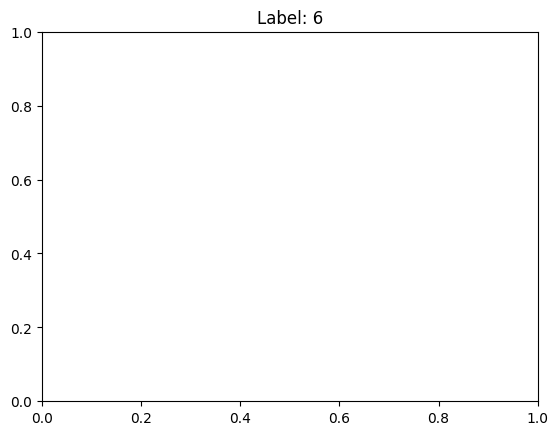

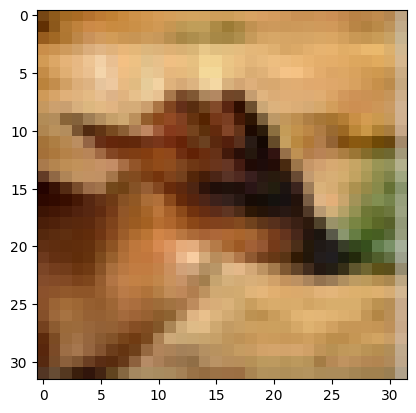

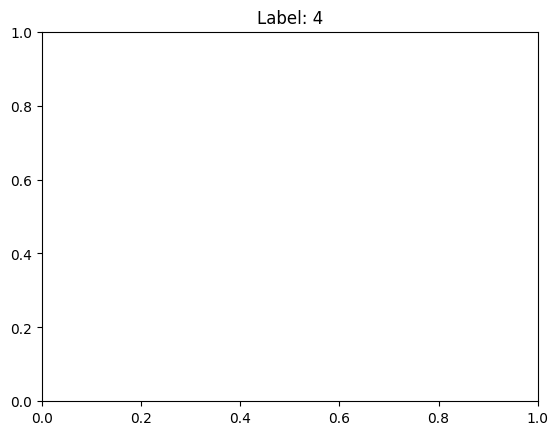

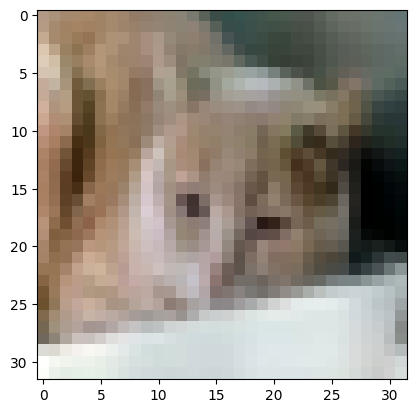

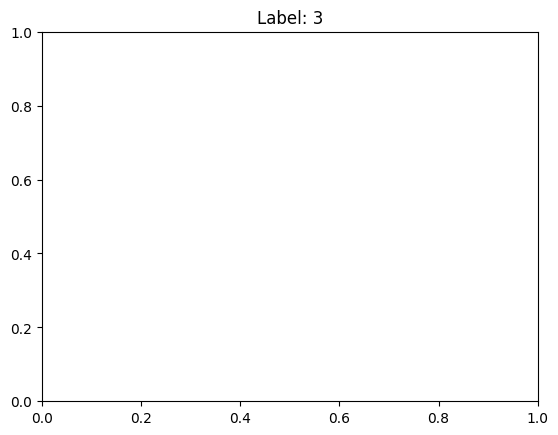

In [3]:
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

for i, (images, labels) in enumerate(trainloader, 0):
    for j in range(5):
        imshow(images[j])
        plt.title(f"Label: {labels[j].item()}")
        plt.show()
    break

+ Xây dựng model MLP cơ bản để train tập dữ liệu CIFAR10

In [4]:
def getModel(n_features):
    model = nn.Sequential(
        nn.Flatten(),
        nn.Linear(n_features, 512),
        nn.ReLU(),
        nn.Dropout(0.2),
        nn.Linear(512, 256),
        nn.ReLU(),
        nn.Dropout(0.2),
        nn.Linear(256, 128),
        nn.ReLU(),
        nn.Linear(128, 10)
    )
    return model


+ Khởi tạo hàm loss function và phương thức optimizer

In [5]:
n_features = 32 * 32 * 3
model = getModel(n_features)
lr = 0.01
optim = optim.Adam(model.parameters(), lr=lr)
loss_fn = nn.CrossEntropyLoss()
model

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=3072, out_features=512, bias=True)
  (2): ReLU()
  (3): Dropout(p=0.2, inplace=False)
  (4): Linear(in_features=512, out_features=256, bias=True)
  (5): ReLU()
  (6): Dropout(p=0.2, inplace=False)
  (7): Linear(in_features=256, out_features=128, bias=True)
  (8): ReLU()
  (9): Linear(in_features=128, out_features=10, bias=True)
)

+ Xây dựng hàm đánh giá model

In [6]:
def evaluate(model, testloader, criterion):
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    test_loss = test_loss / len(testloader)
    return test_loss, accuracy


+ Bắt đầu training và đánh giá model.

In [7]:
n_epochs = 10
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

for epoch in range(n_epochs):
    running_loss = 0.0
    running_correct = 0
    total = 0
    for i, (inputs, labels) in enumerate(trainloader, 0):

        inputs, labels = inputs.to(device), labels.to(device)



        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        running_loss += loss.item()


        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        running_correct += (predicted == labels).sum().item()


    epoch_accuracy = 100 * running_correct / total
    epoch_loss = running_loss / (i + 1)
    test_loss, test_accuracy = evaluate(model, testloader, loss_fn)
    print(f"Epoch [{epoch + 1}/{n_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")


    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

Epoch [1/10], Loss: 2.3057, Accuracy: 10.32%, Test Loss: 2.3055, Test Accuracy: 10.28%
Epoch [2/10], Loss: 2.3055, Accuracy: 10.28%, Test Loss: 2.3055, Test Accuracy: 10.28%
Epoch [3/10], Loss: 2.3056, Accuracy: 10.28%, Test Loss: 2.3055, Test Accuracy: 10.28%
Epoch [4/10], Loss: 2.3055, Accuracy: 10.28%, Test Loss: 2.3055, Test Accuracy: 10.28%
Epoch [5/10], Loss: 2.3056, Accuracy: 10.28%, Test Loss: 2.3055, Test Accuracy: 10.28%
Epoch [6/10], Loss: 2.3056, Accuracy: 10.28%, Test Loss: 2.3055, Test Accuracy: 10.28%
Epoch [7/10], Loss: 2.3055, Accuracy: 10.28%, Test Loss: 2.3055, Test Accuracy: 10.28%
Epoch [8/10], Loss: 2.3055, Accuracy: 10.28%, Test Loss: 2.3055, Test Accuracy: 10.28%
Epoch [9/10], Loss: 2.3055, Accuracy: 10.28%, Test Loss: 2.3055, Test Accuracy: 10.28%
Epoch [10/10], Loss: 2.3056, Accuracy: 10.28%, Test Loss: 2.3055, Test Accuracy: 10.28%


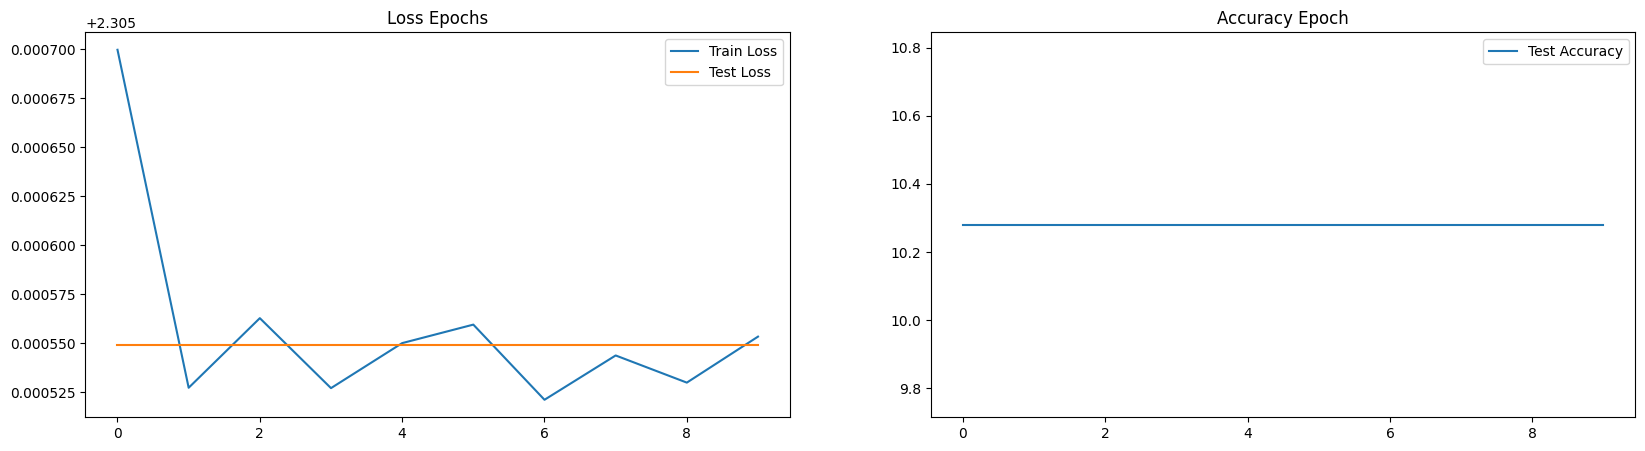

In [8]:
plt.figure(figsize = (20, 5))
plt.subplot(121)
plt.title('Loss Epochs')
plt.plot(train_losses, label = 'Train Loss')
plt.plot(test_losses, label = 'Test Loss')
plt.legend()
plt.subplot(122)
plt.title('Accuracy Epoch')
plt.plot(test_accuracies, label = 'Test Accuracy')
plt.legend()

+ Dưới đây là bài tập về code from scratch

In [10]:
def zScoreScaling(tensor):
    mean = tensor.mean(dim=0, keepdim=True)
    std = tensor.std(dim=0, keepdim=True)
    return (tensor - mean) / std

In [11]:
def minMaxScaling(tensor):
    min_val = tensor.min(dim=0, keepdim=True)[0]
    max_val = tensor.max(dim=0, keepdim=True)[0]
    return (tensor - min_val) / (max_val - min_val)

In [12]:
class Linear:
    def __init__(self, in_features, out_features):
        self.weight = torch.randn(out_features, in_features) * 0.01
        self.bias = torch.zeros(out_features)

    def forward(self, input_tensor):
        return input_tensor @ self.weight.T + self.bias

In [13]:
tensor = torch.tensor([
    [1.0, 2.0, 3.0],
    [4.0, 5.0, 6.0],
    [7.0, 8.0, 9.0]
])
zscore = zScoreScaling(tensor)
min_max = minMaxScaling(tensor)
print(zscore)
print(min_max)


tensor([[-1., -1., -1.],
        [ 0.,  0.,  0.],
        [ 1.,  1.,  1.]])
tensor([[0.0000, 0.0000, 0.0000],
        [0.5000, 0.5000, 0.5000],
        [1.0000, 1.0000, 1.0000]])


In [14]:
tensor = torch.tensor([1.0, 2.0, 3.0])
linear = Linear(3, 2)
out = linear.forward(tensor)
print(out)
print(f"Weight = {linear.weight}")
print(f"Bias = {linear.bias}")

tensor([-0.0382,  0.0619])
Weight = tensor([[ 0.0014, -0.0074, -0.0082],
        [ 0.0160,  0.0147,  0.0055]])
Bias = tensor([0., 0.])
